In [17]:
import torch
words = open('../input/names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [18]:
#creating a bigram
b = {}
for word in words:
  chs = ['<S>'] + list(word) + ['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram,0) + 1

In [19]:
# sorted(b.items(),key=lambda kv: kv[1])
# the lamda function used here returns the index of the last element in the tuple

In [20]:
N = torch.zeros((27,27),dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
#at first the words are taken and in a set therefore removing
#duplicates and then converted to a list which is then sorted
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
#the enumerate function here takes the each charactors in the previous
#list and assigns a number to it
# stoi
itos = {o:p for p,o in stoi.items()}
#here 2 elements p and o is taken p is the charactor and o is the number that
#was assigned to it previously itos just prints that in reverse order
# itos

In [21]:
#changing the above for by using list
for word in words:
  chs = ['.'] + list(word) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ich1 = stoi[ch1]
    ich2 = stoi[ch2]
    N[ich1,ich2] += 1
# N

(-0.5, 26.5, 26.5, -0.5)

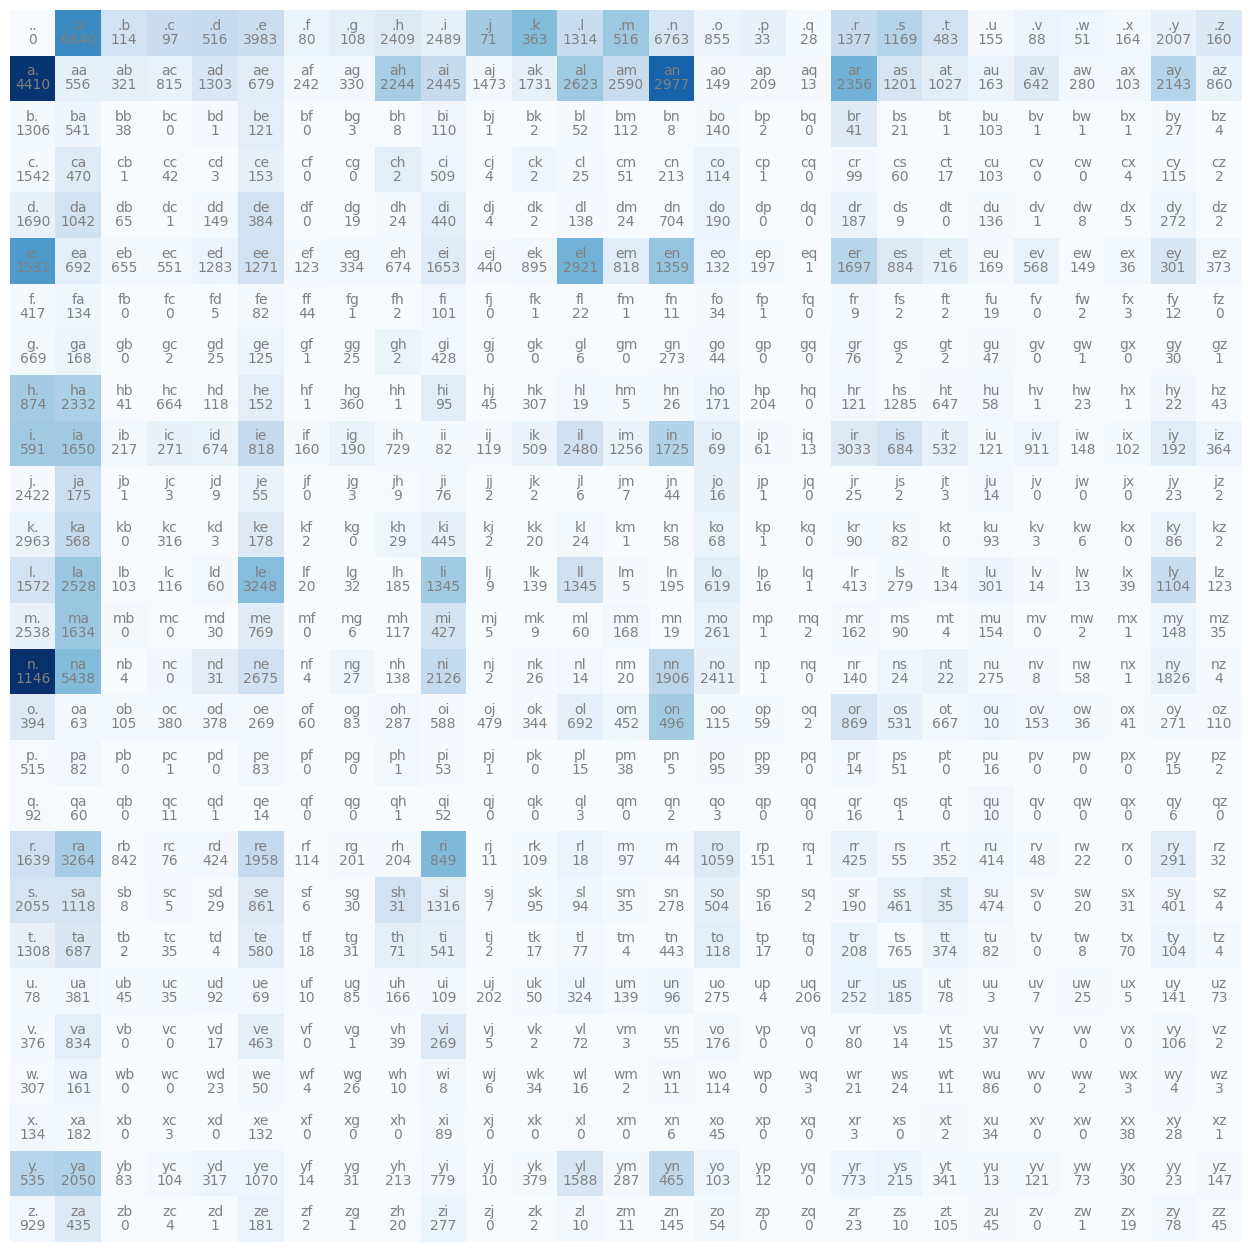

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.imshow(N)
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i]+itos[j]
    plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
    plt.text(j,i, N[j,i].item(), ha='center',va='top',color='gray')
plt.axis('off')

In [23]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [63]:
P = N.float()
# P = P/P.sum()
# P

In [25]:
#understanding torch.multinomial and torch.generator APIs
g = torch.Generator().manual_seed(2147483647)
ts = torch.rand(3,generator = g)
ts= ts/ts.sum()#probabilities 
print(ts)
#here the rand number wont change everytime the cell is ran because of the generator
torch.multinomial(ts,20,replacement = True)
#here the multinomial function uses the propabities in ts and numbers returned are
#indices of the ts based on those probabilities

tensor([0.6064, 0.3033, 0.0903])


tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [26]:
# g = torch.Generator().manual_seed(2147483647)
# ix = torch.multinomial(P,num_samples=1,replacement=True, generator=g).item()
# print(ix)
# itos[ix]

In [27]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out =[]
    ix = 0
    while True:
        P = N[ix].float()
        P = P/P.sum()
#         ix = torch.multinomial(P,num_samples=1,replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))
    
#intresting thing that can be noticed here is that different names are produced eventhough
#there is a generator. This happens because Each time torch.multinomial is called, 
#it consumes some of the random numbers from the generator g. This behaviour can be stopped
#by putting the generator object inside for loop.

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [64]:
#making the above bigram code much more efficient
#can be done by changing the calculation of P 
P = P/P.sum(1, keepdim=True)
#while referening the docs we can understand that the first parameter is dimension and second one is keepdim
# here the summation is done according to the dim and while dividing the 2 matrices it follows the broadcasting
#sematics see the below to understand how dim and keepdim impacts.
# print(P.sum(1,keepdim=False).shape)
# print(P.sum(1,keepdim=False))
# print(P.sum(0,keepdim=False).shape)
# print(P.sum(0,keepdim=False))
# print(P.sum(1,keepdim=True).shape)
# print(P.sum(1,keepdim=True))
# print(P.sum(0,keepdim=True).shape)
# print(P.sum(0,keepdim=True))
# #to understand the role of keepdim refer the documentaion
# # P[26].sum()
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out =[]
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))
    
#refer to the broadcasting sematics very carefully also refer the numpy one because both are similar and numpy has a better explaination

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [28]:
#pytorch tensors and operations
#creating a tensor here we can set dtype and device and stuff like that
device="cuda" if torch.cuda.is_available() else "cpu" # we are setting the device to place the tensor
myten = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32, device=device, requires_grad=True)
myten.shape
#when you dont have the exact values
myten = torch.empty(size=(3,3))
myten = torch.rand(3,3)
myten = torch.eye(3,3)#makes an identity matrix
myten = torch.arange(start = 0, end = 5, step = 1)
myten = torch.linspace(start = 0.1, end = 1, steps = 10)
myten.normal_(mean=2,std=1) #normalises the given matrix with mean=2 and std=1
myten.uniform_(-1,1) #normalises the given matrix uniform matrix ref documentation

tensor([ 0.0929,  0.1181, -0.1106, -0.4168, -0.2855,  0.6237, -0.3852,  0.8434,
        -0.4995, -0.4404])

In [29]:
#converting numpy array into torch
import numpy as np 
arr = np.zeros((5,5))
arr = torch.from_numpy(arr)
arr

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float64)

In [30]:
#tensor math
#inplace operations 
t = torch.ones(10)
t.add(myten) #t= t+myten
#comparison 
t = myten > 0
t
#more https://www.youtube.com/watch?v=x9JiIFvlUwk

tensor([ True,  True, False, False, False,  True, False,  True, False, False])